## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [137]:
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [138]:
performance=pd.read_csv("students-data.csv",sep = ';')

In [139]:
performance.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [282]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int32
G2            395 non-null int32
G3            395 non-null int32
dtyp

In [283]:
performance.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,...,0.949367,0.832911,0.334177,3.108861,2.291139,3.554430,5.708861,0.640506,0.630380,0.670886
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,...,0.219525,0.373528,0.472300,1.113278,1.287897,1.390303,8.003096,0.480461,0.483314,0.470487
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,8.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,75.000000,1.000000,1.000000,1.000000


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [140]:
performance.index.name="number"

In [141]:
performance.isna().sum()
### As per result there are no missing values, so there is no need to drop any of them.

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [142]:
performance.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [143]:
performance.select_dtypes(exclude='int64')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [144]:
performance.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [145]:
threshold = 1
performance.drop(performance.var()[performance.var() < threshold].index.values, axis=1,inplace=True)

In [146]:
performance.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [148]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
categorical_feature_mask = performance.dtypes==object
categorical_cols = performance.columns[categorical_feature_mask].tolist()
performance[categorical_cols] = performance[categorical_cols].apply(lambda col: label.fit_transform(col))
performance.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [149]:
performance['G1']=pd.DataFrame(np.where(performance['G1']>=10,1,0))
performance['G2']=pd.DataFrame(np.where(performance['G2']>=10,1,0))
performance['G3']=pd.DataFrame(np.where(performance['G3']>=10,1,0))
performance.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [150]:
X=performance.drop("G3",axis=1)
y=performance["G3"]
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

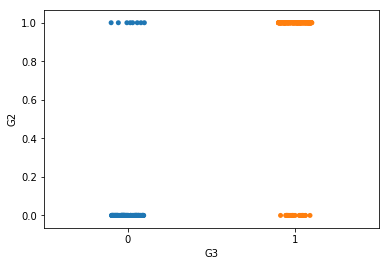

In [151]:
sns.stripplot(x="G3",y="G2",data=performance)

For each change in G2, There is a significant change in G3. So G3 Depends to a greater on G2.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

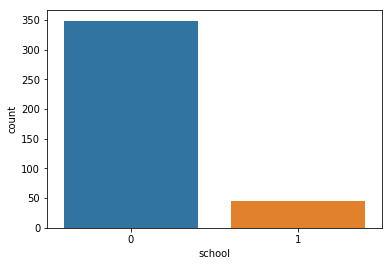

In [152]:
sns.countplot(x="school",data=performance)

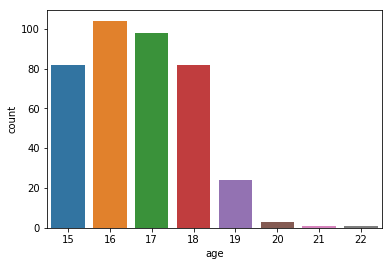

In [153]:
sns.countplot(x="age",data=performance)

In [133]:
perf=pd.read_csv("students-data.csv",sep=";")

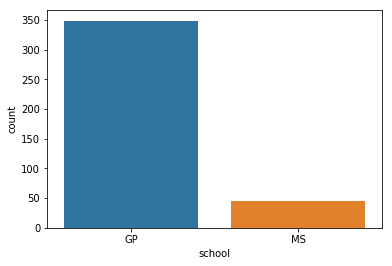

In [134]:
sns.countplot(x="school",data=perf)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.24, random_state=7)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [156]:
from sklearn.linear_model import LogisticRegression

In [158]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)


C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [167]:
model_score = model1.score(x_train, y_train)
model_score

0.9066666666666666

In [166]:
y1_predict = model1.predict(x_test)
model_score = model1.score(x_test, y_test)
model_score

0.9578947368421052

In [162]:
from sklearn.metrics import roc_curve, auc
y_predictProb = model1.predict_proba(x_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
roc_auc

0.963125763125763

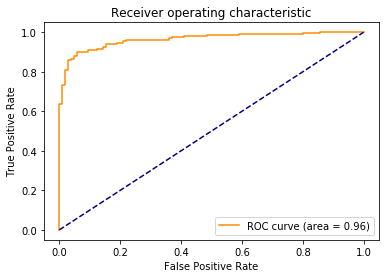

In [163]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [159]:
def logisticRegModelPerformanceAnalysis(X, y, test_size = 0.3, seed = 7):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    ### Unoptimized probability threshold based performance numbers
    # Train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > 0.5, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    trainResults=[X_train.shape[0], 0.5, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > 0.5, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    testResults=[X_test.shape[0], 0.5, testAccuracy, testRecall, testPrecision, testF1score]
    
    #### Optimize probability threshold and calculate performance numbers
    y_predictProb = model.predict_proba(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
    optimalF1 = 0
    optimalTh = 0
    for th in thresholds:
        preds = np.where(model.predict_proba(X_train)[:,1] > th, 1, 0)
        f1Score = f1_score(y_train, preds)
        if(optimalF1 < f1Score):
            optimalF1 = f1Score
            optimalTh = th

    # Optimal probability threshold based train accuracy numbers
    trainPreds = np.where(model.predict_proba(X_train)[:,1] > optimalTh, 1, 0)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    trainRecall = recall_score(y_train, trainPreds)
    trainPrecision = precision_score(y_train, trainPreds)
    trainF1score = f1_score(y_train, trainPreds)
    optimalTrainResults=[X_train.shape[0], optimalTh, trainAccuracy, trainRecall, trainPrecision, trainF1score]
    # Optimal probability threshold based test accuracy numbers
    testPreds = np.where(model.predict_proba(X_test)[:,1] > optimalTh, 1, 0)
    testAccuracy = accuracy_score(y_test, testPreds)
    testRecall = recall_score(y_test, testPreds)
    testPrecision = precision_score(y_test, testPreds)
    testF1score = f1_score(y_test, testPreds)
    optimalTestResults=[X_test.shape[0], optimalTh, testAccuracy, testRecall, testPrecision, testF1score]
    # Concatenate Train and Test results to resultsDf
    resultsDf = pd.DataFrame( index=["dataSize", "optimalTh", "accuracy", "recall", "precision", "f1_score"])
    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    resultsDf['optimalTrainResults'] = optimalTrainResults
    resultsDf['optimalTestResults'] = optimalTestResults
    
    return resultsDf.round(2)

In [160]:
logisticRegModelPerformanceAnalysis(X, y, test_size = 0.24, seed = 7)

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,unOptimalTrainResults,unOptimalTestResults,optimalTrainResults,optimalTestResults
dataSize,300.00,95.00,300.00,95.00
optimalTh,0.50,0.50,0.64,0.64
accuracy,0.91,0.96,0.91,0.95
recall,0.91,0.97,0.90,0.96
precision,0.95,0.97,0.97,0.97
f1_score,0.93,0.97,0.93,0.96


In [171]:
metrics.confusion_matrix(model1.predict(x_train),y_train)

array([[ 95,  18],
       [ 10, 177]], dtype=int64)

In [169]:
metrics.confusion_matrix(y1_predict, y_test)

array([[23,  2],
       [ 2, 68]], dtype=int64)

# Naive bayes with Iris data

### Import Iris.csv

In [235]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [236]:
iris=pd.read_csv("Iris.csv")

In [237]:
iris.head(20)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [213]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

In [214]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [238]:
from sklearn import preprocessing
label1=preprocessing.LabelEncoder()
iris["Class"]=label1.fit_transform(iris["Class"])

In [239]:
iris.tail()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [240]:
X=iris.drop("Class",axis=1)
y=iris["Class"]

In [241]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

### Find the distribution of target variable (Class)

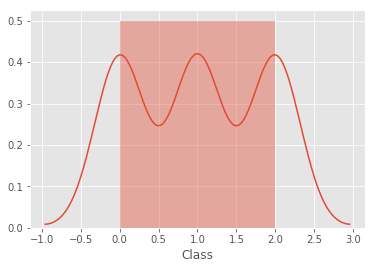

In [251]:
sns.distplot(iris["Class"])
### Target Variable is equally distributed among all the 3 classes 

### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B5CFF3FD0>]],
      dtype=object)

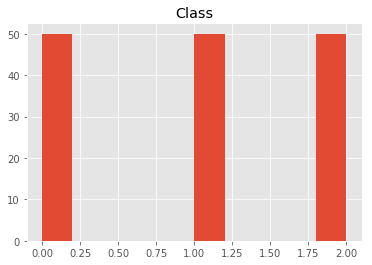

In [248]:
iris.hist(column="Class")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B5B415DA0>,
      dtype=object)

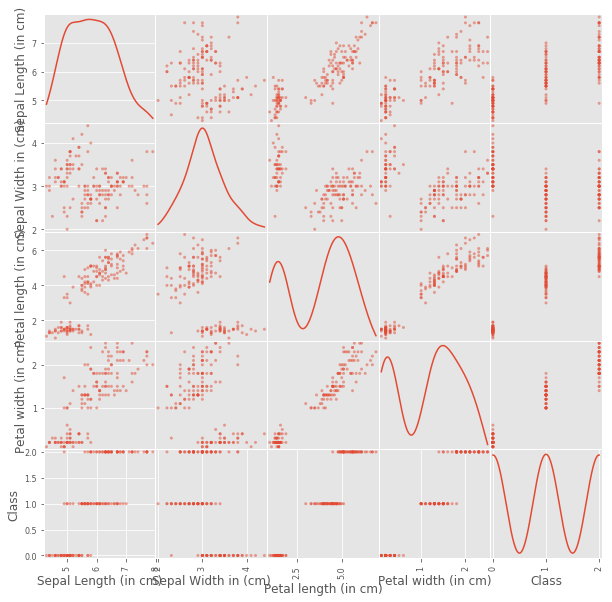

In [284]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris,alpha=0.5,figsize=(10, 10), diagonal='kde')

1) Target variable is equally distributed across all 3 classes

2) Sepal length, petal length, petal width are found to be more closely spaced and associated with Species(target variable).

3) Sepal Width is found to be scattered in a more free manner compared to other variables which implies its not that much associated with the type of species.

### Summary Statistics and explain insights for at least 2 variables

In [244]:
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


1) From the statistics it is evident that mean is higher for Sepal length, width and Petal length compared to petal width.

2) Standard deviation is higher for Petal Length compared to other independent variables.

3) Petal length has more variation in the Quartile ranges.

4) Min and Max values are higher for Sepal Length.

### Correlation among all variables and give your insights

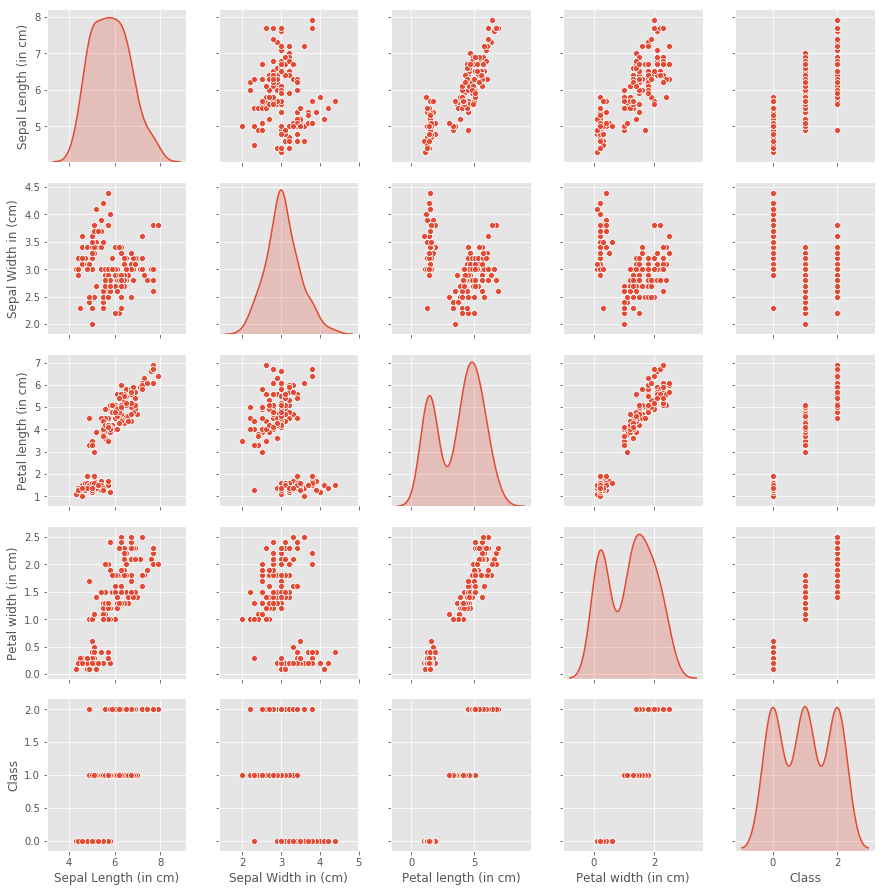

In [245]:
sns.pairplot(iris, diag_kind='kde')

In [246]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


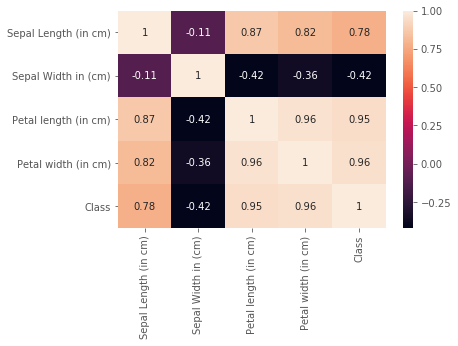

In [247]:
sns.heatmap(iris.corr() , annot=True)

From the correlation matrix and Heatmap it is evident that Petal width is highly correlated with Class(Species) followed by Petal Length and Sepal Length. 

Sepal Width is negatively correlated with Class.

### Split data in Training and Validation in 80:20

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
X_train.shape

(120, 4)

In [255]:
X_test.shape

(30, 4)

### Do Feature Scaling

In [262]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(iris) 

C:\Users\SHIVAKUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [263]:
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Train and Fit NaiveBayes Model

In [259]:
model2 = GaussianNB()

In [260]:
model2.fit(X_train, y_train)
print(model2)

GaussianNB(priors=None, var_smoothing=1e-09)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [272]:
print("Train Accuracy:",model2.score(X_train, y_train))
print("Test Accuracy:",model2.score(X_test, y_test))

Train Accuracy: 0.9833333333333333
Test Accuracy: 0.8333333333333334


In [269]:
predicted = model2.predict(X_train)
metrics.confusion_matrix(predicted, y_train)

array([[43,  0,  0],
       [ 0, 38,  2],
       [ 0,  0, 37]], dtype=int64)

In [270]:
predicted = model2.predict(X_test)
metrics.confusion_matrix(predicted, y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]], dtype=int64)

1) Accuracy for Train data is around 98% and test data is around 83%

2) In the train data only 2 values have been predicted wrongly as per confusion matrix

3) In the test data 5 variables are foudn to have been wrongly predicted.

There is 83% assurance that the any newly predicted class would be correct.